In [1]:
from swarm_importance import SwarmImportance


import xgboost 
import threading

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score

## Load dataset

In [2]:
dataset = pd.read_csv('datasets/iris.csv')

X = dataset.values[:, :-3]
y = dataset.values[:, -3]
X_backup = X.copy()
y_backup = y.copy()

y = y + abs(min(y))
min_value = np.min(X)
if min_value < 0.0:
    X = X + abs(min_value)
X = X+1
# X = normalize(X, 'l2', axis=1) # for indian_liver
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

feature_names = dataset.columns[:-3].values
feature_names

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

## Fitting models

In [3]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# gnb = GaussianNB()
# gnb.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

model =  lr
print(">> Acc all: %.5f" % (accuracy_score(y_test, model.predict(X_test))))
print(">> Acc 0: %.5f" % (accuracy_score(y_test[y_test == 0], model.predict(X_test[y_test == 0]))))
print(">> Acc 1: %.5f" % (accuracy_score(y_test[y_test == 1], model.predict(X_test[y_test == 1]))))
print(">> Acc 2: %.5f" % (accuracy_score(y_test[y_test == 2], model.predict(X_test[y_test == 2]))))


>> Acc all: 1.00000
>> Acc 0: 1.00000
>> Acc 1: 1.00000
>> Acc 2: 1.00000


C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
swarm = SwarmImportance(max_it=100, N=10, m=X_test.shape[1], model=model, feature_names=feature_names, n_classes=len(np.unique(y)), verbose=True)






In [5]:
swarm.fit_transform(X_test, y_test, strategy='mean')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding feature weights for class 0...
Feature 3 => epoch 10/100
Feature 0 => epoch 10/100
Feature 1 => epoch 10/100
Feature 2 => epoch 10/100
Feature 3 => epoch 20/100
Feature 0 => epoch 20/100
Feature 1 => epoch 20/100
Feature 2 => epoch 20/100
Feature 3 => epoch 30/100
Feature 3 => epoch 40/100
Feature 0 => epoch 30/100
Feature 1 => epoch 30/100
Feature 2 => epoch 30/100
Feature 3 => epoch 50/100
Feature 3 => epoch 60/100
Feature 0 => epoch 40/100
Feature 1 => epoch 40/100
Feature 2 => epoch 40/100
Feature 3 => epoch 70/100
Feature 0 => epoch 50/100
Feature 3 => epoch 80/100
Feature 1 => epoch 50/100
Feature 2 => epoch 50/100
Feature 3 => epoch 90/100
Feature 0 => epoch 60/100
Feature 2 => epoch 60/100
Feature 1 => epoch 60/100
Feature 3 => epoch 100/100
Done for feature 3.
Feature 0 => epoch 70/100
Feature 1 => epoch 70/100
Feature 2 => epoch 70/100
Feature 0 => epoch 80/100
Feature 1 => epoch 80/100
Feature 2 => epoch 80/100
Feature 0 => epoch 90/100
Feature 1 => epoch 90/100
Feat

 33%|████████████████████████████                                                        | 1/3 [00:28<00:57, 28.67s/it]

Feature 1 => epoch 100/100
Done for feature 1.
Feature 2 => epoch 100/100
Done for feature 2.
Done finding weights!
Now computing importances!

Finding feature weights for class 1...
Feature 1 => epoch 10/100
Feature 0 => epoch 10/100
Feature 3 => epoch 10/100
Feature 2 => epoch 10/100
Feature 1 => epoch 20/100
Feature 0 => epoch 20/100
Feature 2 => epoch 20/100
Feature 3 => epoch 20/100
Feature 1 => epoch 30/100
Feature 2 => epoch 30/100
Feature 0 => epoch 30/100
Feature 3 => epoch 30/100
Feature 1 => epoch 40/100
Feature 0 => epoch 40/100
Feature 2 => epoch 40/100
Feature 3 => epoch 40/100
Feature 1 => epoch 50/100
Feature 0 => epoch 50/100
Feature 2 => epoch 50/100
Feature 3 => epoch 50/100
Feature 1 => epoch 60/100
Feature 0 => epoch 60/100
Feature 2 => epoch 60/100
Feature 3 => epoch 60/100
Feature 1 => epoch 70/100
Feature 0 => epoch 70/100
Feature 2 => epoch 70/100
Feature 3 => epoch 70/100
Feature 1 => epoch 80/100
Feature 2 => epoch 80/100
Feature 0 => epoch 80/100
Feature 3 =

 67%|████████████████████████████████████████████████████████                            | 2/3 [01:01<00:29, 29.93s/it]

Done finding weights!
Now computing importances!

Finding feature weights for class 2...
Feature 1 => epoch 10/100
Feature 0 => epoch 10/100
Feature 3 => epoch 10/100
Feature 2 => epoch 10/100
Feature 1 => epoch 20/100
Feature 2 => epoch 20/100
Feature 3 => epoch 20/100
Feature 0 => epoch 20/100
Feature 1 => epoch 30/100
Feature 2 => epoch 30/100
Feature 3 => epoch 30/100
Feature 0 => epoch 30/100
Feature 1 => epoch 40/100
Feature 2 => epoch 40/100
Feature 3 => epoch 40/100
Feature 0 => epoch 40/100
Feature 1 => epoch 50/100
Feature 3 => epoch 50/100
Feature 2 => epoch 50/100
Feature 0 => epoch 50/100
Feature 1 => epoch 60/100
Feature 2 => epoch 60/100
Feature 3 => epoch 60/100
Feature 0 => epoch 60/100
Feature 1 => epoch 70/100
Feature 2 => epoch 70/100
Feature 3 => epoch 70/100
Feature 0 => epoch 70/100
Feature 1 => epoch 80/100
Feature 2 => epoch 80/100
Feature 3 => epoch 80/100
Feature 0 => epoch 80/100
Feature 1 => epoch 90/100
Feature 3 => epoch 90/100
Feature 2 => epoch 90/100
F

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:36<00:00, 32.09s/it]

Done finding weights!
Now computing importances!



C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wilso\Documents\EUROVIS-SWARM\swarm_importance\explainer.py:368: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


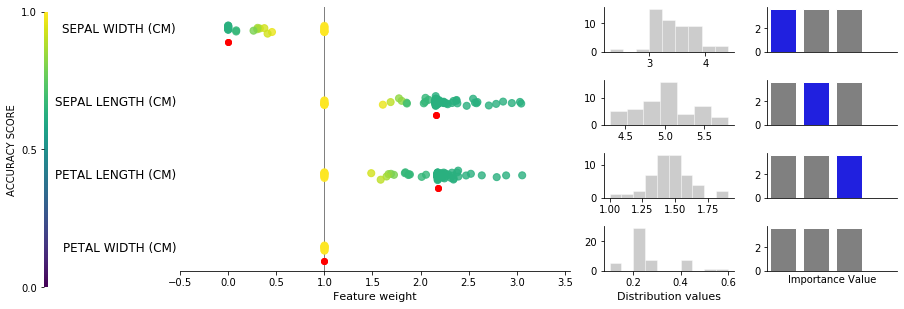

In [6]:
swarm.plot_importance(0, X_backup, y_backup, plot_execution=True, show_best=True)#, filepath='datasets/figs/iris-class0.pdf')

C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wilso\Documents\EUROVIS-SWARM\swarm_importance\__init__.py:368: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


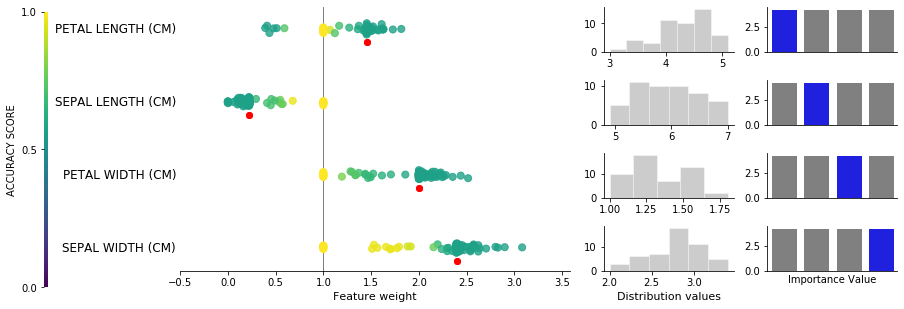

In [7]:
swarm.plot_importance(1, X_backup, y_backup, plot_execution=True, show_best=True, filepath='datasets/figs/iris-class1.pdf')

C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wilso\Documents\EUROVIS-SWARM\swarm_importance\__init__.py:368: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


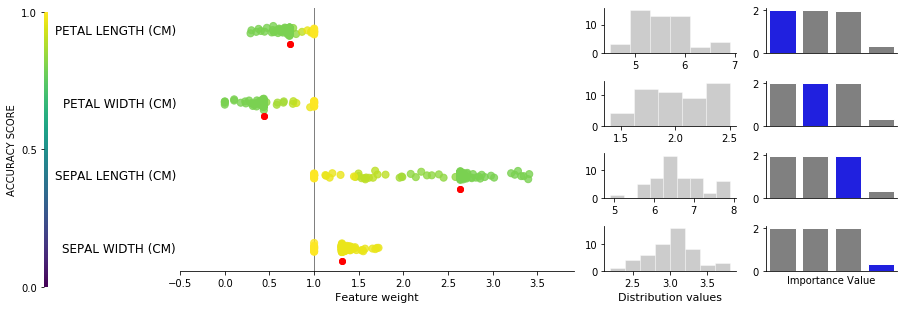

In [8]:
swarm.plot_importance(2, X_backup, y_backup, plot_execution=True, show_best=True, filepath='datasets/figs/iris-class2.pdf')

In [9]:
swarm.important_features(klass=0)

,names,w,acc,importances
1,sepal width (cm),1.000000,0.366667,3.635538
2,petal length (cm),1.177908,0.366667,3.630000
0,sepal length (cm),0.000000,0.000000,0.000000
3,petal width (cm),0.000000,0.000000,0.000000


In [10]:
swarm.important_features()

,names,importances
0,petal length (cm),9.945844
3,sepal width (cm),8.255538
1,petal width (cm),6.295298
2,sepal length (cm),6.289201
